# Pandas

- NumPy is the main library for handling data
- But NumPy is not so user-friendly (but very fast)
- Pandas is BUILT ON TOP of NumPy
  - Pandas follows many syntax like NumPy....so it means what you can do in NumPy usually can be done in Pandas.....
  - Pandas object is BASICALLY a NumPy array.....
- Pandas vs. NumPy
  - Well, people just add many useful functions for Pandas....instead of you writing manually...
    - Example:  fillna --> masking, filling the values
    - Example:  isna().sum() --> isnan()

In [1]:
import pandas as pd
pd.__version__

'1.4.3'

In [3]:
df = pd.read_csv('data/lifeexp.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Accessing the column

In [8]:
type(df['Status'])  #df.Status  #series is nothing but a 1D NumPy array

pandas.core.series.Series

In [12]:
#format:  df[  [list of columns]   ]
type(df[  ['Status', 'Alcohol', 'GDP']   ])  #dataframe is nothing but a 2D NumPy array

pandas.core.frame.DataFrame

### Masking

In [14]:
cond = df.Status == 'Developing'

df[cond].shape  #do .shape to know how many rows is developing.....

(2426, 22)

In [16]:
#strip the spaces
df.columns = df.columns.str.strip()  #only remove abnormal spaces.....
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
#rename some columns
df = df.rename(
    columns = {
        'Life expectancy': 'lifeexp',
        'Adult Mortality': 'mortality',
        'infant deaths'  : 'infantd',
        'percentage expenditure' : 'percentage',
        'Hepatitis B' : 'hepB',
        'under-five deaths' : 'under-five',
        'Total expenditure' : 'total',
        'thinness  1-19 years': 'thin1-19',
        'thinness 5-9 years'  : 'thin5-9',
        'Income composition of resources' : 'income'
    }
)

In [18]:
df.columns

Index(['Country', 'Year', 'Status', 'lifeexp', 'mortality', 'infantd',
       'Alcohol', 'percentage', 'hepB', 'Measles', 'BMI', 'under-five',
       'Polio', 'total', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thin1-19', 'thin5-9', 'income', 'Schooling'],
      dtype='object')

In [22]:
cond1 = df.Status == 'Developing'
cond2 = df.income > 0.5

df[cond1 & cond2].shape  #to put or, use |

(1586, 22)

In [35]:
#Ex1:  Count how many countries in the Developing and Developed countries
unique = df.Status.unique()
for status in unique:
    cond = df.Status == status
    print(len(df[cond]), status)
    
#instead, do this:
df.Status.value_counts()  #this is optional...

2426 Developing
512 Developed


Developing    2426
Developed      512
Name: Status, dtype: int64

In [39]:
#Ex2:  See how many countries have HIV/AIDS greater than mean and life expectancy is higher than mean
cond1 = df['HIV/AIDS'] > df['HIV/AIDS'].mean()
cond2 = df['lifeexp']  > df['lifeexp'].mean()

tmp = df[cond1 & cond2]

tmp['Country'].unique()

array(['Dominican Republic', 'Jamaica'], dtype=object)

In [42]:
#Ex3:  See how many countries have 'total' greater than 'schooling'
cond = df.total > df.Schooling

df[cond]['Country'].unique()

# df.loc[cond, 'Country'].unique()


array(['Afghanistan', 'Angola', 'Antigua and Barbuda',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi', 'Chad',
       'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Haiti',
       'Kiribati', 'Lesotho', 'Liberia', 'Malawi', 'Maldives', 'Mali',
       'Marshall Islands', 'Micronesia (Federated States of)',
       'Montenegro', 'Mozambique', 'Niger', 'Papua New Guinea',
       'Sao Tome and Principe', 'Sierra Leone', 'Sudan', 'Timor-Leste',
       'Turkmenistan', 'Tuvalu', 'Uganda'], dtype=object)

In [29]:
df.Polio.mean()

82.55018842069202

### iloc and loc

- very powerful function
- daily used....

In [54]:
#i here means "implicit"
#loc means location
#format iloc
#df.iloc[rowindex, colindex]  #here index can be used as slicing as well; I don't remember you can fancy indexing....
tmp.iloc[:5, :2]

,Country,Year
779,Dominican Republic,2006
780,Dominican Republic,2005
781,Dominican Republic,2004
782,Dominican Republic,2003
783,Dominican Republic,2002


In [55]:
#let me try whether iloc can use fancy indexing....
tmp.iloc[  [0, 2]  ]

,Country,Year,Status,lifeexp,mortality,infantd,Alcohol,percentage,hepB,Measles,...,Polio,total,Diphtheria,HIV/AIDS,GDP,Population,thin1-19,thin5-9,income,Schooling
779,Dominican Republic,2006,Developing,72.3,178.0,7,6.20,352.955127,84.0,0,...,88.0,4.34,89.0,1.8,3836.468771,9371338.0,3.5,3.4,0.677,12.6
781,Dominican Republic,2004,Developing,69.3,214.0,7,5.16,182.616252,82.0,0,...,66.0,4.28,79.0,2.1,2421.966200,912998.0,3.6,3.5,0.666,12.5


In [64]:
#but what if i want to specify using the column name....
#for column name, you need to use "loc" which stands for explicit location
#format: loc[explicit row index, explicit column index]
tmp.columns

Index(['Country', 'Year', 'Status', 'lifeexp', 'mortality', 'infantd',
       'Alcohol', 'percentage', 'hepB', 'Measles', 'BMI', 'under-five',
       'Polio', 'total', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thin1-19', 'thin5-9', 'income', 'Schooling'],
      dtype='object')

In [65]:
tmp.index

Int64Index([779, 780, 781, 782, 783, 784, 785, 1308, 1309, 1310, 1311, 1312,
            1313],
           dtype='int64')

In [67]:
tmp.loc[[779, 1308], ['Country', 'Status'] ]

,Country,Status
779,Dominican Republic,Developing
1308,Jamaica,Developing


In [ ]:
#if you want to change the index column
#use set_index(column)

In [80]:
#Ex1:  I believe there are some rows that have abnormal income, can you check for me....use masking + 
# loc/iloc abnormal greater than 75%...0.779000
cond = df.income > df.income.describe()['75%']
# df.loc[cond, 'Country'].unique()   #<---this is also ok...
df.loc[cond].iloc[:5]  #<---iloc is more manual access

#Ex2:  Find the countries that are developing (set this as cond), and use loc[cond, 'Country']
cond = df.Status == 'Developing'
df.loc[cond, 'Country'].iloc[  [0, 8]  ] #when you say unique(), this becomes a numpy array
#NumPy array DOES NOT have iloc....both series and dataframe have iloc and loc

0    Afghanistan
8    Afghanistan
Name: Country, dtype: object

Break: 10:15 - 10:25

# Drop columns

In [84]:
df.columns

Index(['Country', 'Year', 'Status', 'lifeexp', 'mortality', 'infantd',
       'Alcohol', 'percentage', 'hepB', 'Measles', 'BMI', 'under-five',
       'Polio', 'total', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thin1-19', 'thin5-9', 'income', 'Schooling'],
      dtype='object')

In [87]:
#format: df.drop(columns = [list of columns], inplace=True)
# df.drop(
#     columns = ['hepB', 'Diphtheria'], inplace=True
# )

# df.columns

#Ex1:  can you drop Polio and Measles as well....
df.drop(
    columns = ['Polio', 'Measles'], inplace=True
)

df.columns

Index(['Country', 'Year', 'Status', 'lifeexp', 'mortality', 'infantd',
       'Alcohol', 'percentage', 'BMI', 'under-five', 'total', 'HIV/AIDS',
       'GDP', 'Population', 'thin1-19', 'thin5-9', 'income', 'Schooling'],
      dtype='object')

# Select_dtypes

- useful ways to get a list of columns based on their dtypes
- sometimes we want to gather "int/float" columns and perform e.g., `sns.countplot`
- sometimes we want to group  "object" columns and perform e.g., `sns.boxplot` using some simple for loop

In [90]:
df.dtypes  #this list down all the type....

Country        object
Year            int64
Status         object
lifeexp       float64
mortality     float64
infantd         int64
Alcohol       float64
percentage    float64
BMI           float64
under-five      int64
total         float64
HIV/AIDS      float64
GDP           float64
Population    float64
thin1-19      float64
thin5-9       float64
income        float64
Schooling     float64
dtype: object

In [91]:
numeric_cols = df.select_dtypes(include = ['int64', 'float64'])  #can also "exclude"
numeric_cols.columns

Index(['Year', 'lifeexp', 'mortality', 'infantd', 'Alcohol', 'percentage',
       'BMI', 'under-five', 'total', 'HIV/AIDS', 'GDP', 'Population',
       'thin1-19', 'thin5-9', 'income', 'Schooling'],
      dtype='object')

In [92]:
discrete_cols = df.select_dtypes(include = ['object'])  #can also use "exclude"
discrete_cols.columns

Index(['Country', 'Status'], dtype='object')

In [95]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in numeric_cols.columns:
#     sns.countplot(data = df, x = col)
#     plt.show()

# Sample (useful for imbalanced class dataset)

- selecting only a subset of data
- when we have imbalanced class dataset
- maybe we have a dataset of y, in which positive has 1000 samples, but negative only have 50 samples
- this will be a problem for our machine learning
  - why?  because our model can just cheat and just predict positive and will get 95% accuracy....
    - 95 comes from 1000 / (1000 + 50)

- we can sample 50 negatives, but ALSO 50 positives only (and do this many times, and average the accuracy)

In [99]:
#format: df.sample(n = number of samples)  #this function will let sample a subset of data
#format: df.sample(frac = percentage)      #this will let you sample a fraction percentage of the data

#if you always want the same subset, use random_state
#random state keep your dataset the same everything you run again...
subset_200 = df.sample(n = 200, random_state = 999)  #this is automatically random....
subset_200.shape

#you can also use frac
subset_75 = df.sample(frac = 0.75, random_state = 999)
subset_75.shape

(2204, 18)

In [113]:
#Ex1:  Sample 50% of data, but in which income must be greater than the mean
cond = df.income > df.income.mean()
subset50 = df[cond].sample(frac = 0.5)
subset50.shape

#Ex2:  For each country, sample only 1 row of data.....
#hint: pd.concat([df1, df2, df3......], axis='rows') #or axis=0

#1. get the unique countries first
countries = df.Country.unique()

#2. loop, sample, add them to a list of dataframes
somelist = []
for country in countries:
    cond = df.Country == country
    tmp = df[cond].sample(n = 1)
    somelist.append(tmp)
    
#3. concat this list using pd.concat(thislist, axis='rows)
#format: pd.concat([list of dataframes], axis='rows/0  or  columns/1") use rows or 0 are same....
new_df = pd.concat(somelist, axis='rows')

new_df.head()

#11:25....

,Country,Year,Status,lifeexp,mortality,infantd,Alcohol,percentage,BMI,under-five,total,HIV/AIDS,GDP,Population,thin1-19,thin5-9,income,Schooling
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,17.6,93,8.52,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
29,Albania,2002,Developing,73.3,15.0,1,3.73,104.516916,46.9,1,6.30,0.1,1453.642777,3511.0,2.0,2.1,0.670,10.7
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,58.4,24,7.21,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
54,Angola,2009,Developing,49.1,369.0,81,7.01,212.922933,19.8,127,4.37,2.5,3347.844850,22549547.0,9.3,9.2,0.480,8.5
78,Antigua and Barbuda,2001,Developing,73.8,154.0,0,7.51,163.767698,38.9,0,4.48,0.1,9358.154162,NaN,3.6,3.5,0.000,0.0


In [110]:
new_df.Country.value_counts()

Afghanistan      1
Lithuania        1
Nigeria          1
Niue             1
Norway           1
                ..
Grenada          1
Guatemala        1
Guinea           1
Guinea-Bissau    1
Zimbabwe         1
Name: Country, Length: 193, dtype: int64

# Groupby

- group some things together
- use the function `.grouby`

In [119]:
#dataframe.groupby([list of columns])[whatever columns].aggregationfunc()
#aggregationfunc() can be sum(), max(), std(), count(), mean(), median()
df.groupby(['Country'])[ ['lifeexp', 'BMI'] ].sum()

,lifeexp,BMI
Country,,
Afghanistan,931.1,248.3
Albania,1202.5,785.1
Algeria,1177.9,779.9
Angola,784.3,288.3
Antigua and Barbuda,1200.9,614.8
...,...,...
Venezuela (Bolivarian Republic of),1174.2,871.8
Viet Nam,1196.4,179.0
Yemen,1021.8,535.8


In [121]:
group_obj = df.groupby(['Country'])

In [127]:
#this groupby object has some aggregation function that you can use...unlike normal dataframe

In [130]:
sum_lifeexp = group_obj['lifeexp'].sum()

In [137]:
#Ex1:  Groupby developing countries, and developed countries, and find the average life expectancy
groupby_obj = df.groupby(['Status'])

groupby_obj['lifeexp'].mean()

Status
Developed     79.197852
Developing    67.111465
Name: lifeexp, dtype: float64

# Fillna, dropna, isna

- I will not teach this one...we already know...

### Big Exercise

# 1. ETL (Load the data) - 10 mins
- load the data
- understand the data

In [138]:
df = pd.read_csv('data/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


In [139]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [140]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4978.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.904632,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.044911,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.207500,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.850000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# Make them equal first

In [157]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [160]:
#  VERY IMPORTANT CONCEPT....YOU MUST DO THIS WHEN YOU HAVE imbalanced dataset....
cond0 = df.stroke == 0
cond1 = df.stroke == 1

df_nostroke1   = df[cond0].sample(n=248, random_state=1)
df_nostroke2   = df[cond0].sample(n=248, random_state=2)
df_nostroke3   = df[cond0].sample(n=248, random_state=3)
df_nostroke4   = df[cond0].sample(n=248, random_state=4)
df_nostroke5   = df[cond0].sample(n=248, random_state=5)


df_withstroke = df[cond1]

new_df  = pd.concat([df_nostroke1, df_withstroke])
new_df2 = pd.concat([df_nostroke2, df_withstroke])
new_df3 = pd.concat([df_nostroke3, df_withstroke])
new_df4 = pd.concat([df_nostroke4, df_withstroke])
new_df5 = pd.concat([df_nostroke5, df_withstroke])

new_df.stroke.value_counts()

#once you do this, please run the EDA again.....

0    248
1    248
Name: stroke, dtype: int64

# 2. EDA - 25 mins
- try some masking + loc/iloc
- try at least one groupby
- try some seaborn graph

- Example
  - you wanna using masking and loc to find out
    - whether age impacts stroke
    - whether hypertension impacts stroke
  - groupby residence_type, and look at the stroke
  - groupby work_type, and look at the stroke
  - groupby ever_married, and look at the stroke
  - just use
    - Univariate analysis (analyse one variable)
      - `countplot` for continuous variable
      - `distplot` for discrete variable
    - Multivariate analysis (analyze 2 or more variables)
      - `boxplot` for discrete vs. continuous variable
      - `scatterplot` for continuous vs. continuous variable

In [161]:
cond0 = new_df.hypertension == 0
cond1 = new_df.hypertension == 1

print("Probability of getting stroke in non-hypertension case", new_df.loc[cond0, 'stroke'].mean())
print("Probability of getting stroke in hypertension case",     new_df.loc[cond1, 'stroke'].mean())

Probability of getting stroke in non-hypertension case 0.4482758620689655
Probability of getting stroke in hypertension case 0.7333333333333333


In [162]:
new_df.age.describe()
#divide into three groups

#NO right or wrong.....it depends on your choice...
#group 1:  less than (min + std)
#group 2:  between (min + std) and (mean)
#group 3:  greater than mean

cond0  = new_df.age  <  (new_df.age.min() + new_df.age.std())
cond1a  = new_df.age >= (new_df.age.min() + new_df.age.std()) #put a bracket if you want two conds in one line....
cond1b = new_df.age <= (new_df.age.mean())
cond2  = new_df.age >  new_df.age.mean()

print("Very young: ", new_df.loc[cond0, 'stroke'].mean())
print("Middle: ",     new_df.loc[cond1a & cond1b, 'stroke'].mean())
print("Very old: ",   new_df.loc[cond2, 'stroke'].mean())

#Age is a very important factor for having stroke....


Very young:  0.03508771929824561
Middle:  0.24
Very old:  0.726643598615917


In [ ]:
# df.corr()

In [163]:
#can you guys try glucose level
cond0  = new_df.avg_glucose_level <  new_df.avg_glucose_level.describe()['25%']
cond1a = new_df.avg_glucose_level >= new_df.avg_glucose_level.describe()['25%']
cond1b = new_df.avg_glucose_level <= new_df.avg_glucose_level.describe()['50%']
cond2  = new_df.avg_glucose_level >  new_df.avg_glucose_level.describe()['50%']

new_df.loc[cond0, 'stroke'].mean(), new_df.loc[cond1a & cond1b, 'stroke'].mean(), new_df.loc[cond2, 'stroke'].mean()

(0.5121951219512195, 0.3790322580645161, 0.5487804878048781)

In [164]:
#try heart disease....
cond0  = new_df.heart_disease <  new_df.heart_disease.describe()['25%']
cond1a = new_df.heart_disease >= new_df.heart_disease.describe()['25%']
cond1b = new_df.heart_disease <= new_df.heart_disease.describe()['50%']
cond2  = new_df.heart_disease >  new_df.heart_disease.describe()['50%']

new_df.loc[cond0, 'stroke'].mean(), new_df.loc[cond1a & cond1b, 'stroke'].mean(), new_df.loc[cond2, 'stroke'].mean()

#press one variable, and do Cltr/Cmd + D
#heart disease is a very important factor!!!

(nan, 0.4652777777777778, 0.734375)

In [141]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

  - groupby residence_type, and look at the stroke
  - groupby work_type, and look at the stroke
  - groupby ever_married, and look at the stroke

In [165]:
new_df.groupby(['Residence_type'])['stroke'].mean()
#do this same for work_type and ever_married

Residence_type
Rural    0.514151
Urban    0.482143
Name: stroke, dtype: float64

In [167]:
new_df.groupby(['work_type'])['stroke'].mean()

work_type
Govt_job         0.450704
Private          0.503497
Self-employed    0.659794
children         0.055556
Name: stroke, dtype: float64

In [168]:
new_df.groupby(['ever_married'])['stroke'].mean()

ever_married
No     0.266055
Yes    0.565891
Name: stroke, dtype: float64

In [ ]:
#Why our mean() is so low.....???
#the answer is we have much more 'no stroke' compared to 'stroke', that's why the number is so small
#we can first sample equal amount of stroke vs. no stroke
#and then do everything again - check mean() again....

In [156]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

Conclusion:
    - Age is important
    - Hypertension is important
    - Heart disease is important

# 3. Feature Selection  - 10 mins
- Set the X using the top three features of your choice
- Set the y
- Split the dataset into training and testing

In [ ]:
#Why split first, before cleaning.....

#THIS IS VERY IMPORTANT....you MUST ALWAYS SPLIT FIRST, BEFORE DOING ANY PREPROCESSING

#why: 
#  because if you do preprocessing first, then split, you will have a problem called **Data Leakage**

#Data Leakage is the situation in which some information of your test set flows to your training set....

#e.g., if you standardize first, your whole data is actually a mix of training and testing set....

In [169]:
X = df[  ['age', 'hypertension', 'heart_disease'] ]
#i want to be clear why I use big X
#big X means a matrix or 2-dimensional.....-->math notations
y = df['stroke']
#i use small y because y here is one-dimensional

#recall that for sklearn
#X must be 2 dimensional
#y should be 1 dimensional (but sometimes 2 dimensional.....)
assert X.ndim == 2
assert y.ndim == 1

#split.....
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9999)


# 5. Preprocessing - 25 mins
- Fill the missing values, if any
- Standardize your data

In [ ]:
#fill first or standardize first
#if you fill with mean(), it does not matter - fill or standardize first is the same
#if you fill with median(), you MUST fill first, then standardize

#to fill whether with mean or median, we look at the distribution
#if it is (quite) normal, we fill with mean
#if not (most of the time), we fill with median

In [172]:
X_train.isna().sum()

age              0
hypertension     0
heart_disease    0
dtype: int64

In [174]:
# import seaborn as sns
# sns.displot(X_train['age'])
X_train['age'].fillna(X_train['age'].median(), inplace=True)

#to fill missing value for X_test, you MUST USE the statistics from the training set....
#so that they are in the same distribution....
#but remember, never allow any information of test set flows to training set.....
X_test['age'].fillna(X_train['age'].median(), inplace=True)

<ipython-input-174-d16fd3a71e79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'].fillna(X_train['age'].median(), inplace=True)


In [185]:
X_train['hypertension'].unique()
#hypertension is a categorical / discrete variable, NOT CONTINUOUS
#so it does not make sense to fill with mean / median

#many ways to fill categorical / discrete variable
#1. the most common category - .mode()[0]
#2. just set to "No category" - when you are not sture
#3. set so that the ratio of categories don't change (I will teach you this next week....)

array([1, 0])

In [180]:
# import seaborn as sns
# sns.displot(X_train['hypertension'])
# X_train['hypertension'].mean(), X_train['hypertension'].median(), X_train['hypertension'].mode()[0]
X_train['hypertension'].fillna(X_train['hypertension'].mode()[0], inplace=True)
X_test['hypertension'].fillna(X_train['hypertension'].median(), inplace=True)

<ipython-input-180-2f76a81778ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hypertension'].fillna(X_train['hypertension'].mode()[0], inplace=True)


In [182]:
# import seaborn as sns
# sns.displot(X_train['heart_disease'])
# X_train['heart_disease'].mean(), X_train['heart_disease'].median(), X_train['heart_disease'].mode()[0]
# use mode for discrete feature, use mean/median for continuous features.....
X_train['heart_disease'].fillna(X_train['heart_disease'].mode()[0], inplace=True)
X_test['heart_disease'].fillna(X_train['heart_disease'].mode()[0], inplace=True)

<ipython-input-182-6ffa03342a7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['heart_disease'].fillna(X_train['heart_disease'].mode()[0], inplace=True)


In [184]:
y_train.isna().sum()
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)

In [186]:
from sklearn.preprocessing import StandardScaler

sample_data = [[   1, 2], [1, 2], [3, 4], [3, 4]   ]
#imagine this data has four samples
#the first feature is 1, 1, 3, 3
#the second feature is 2, 2, 4, 4

#-1 comes from
# take the mean of first feature 1 + 1 + 3 + 3 / 4 = 2
# format: number - mean / std
# (1 - 2) / std ; (1 - 2) / std; (3 - 1) / std; (3 - 1) / std
#standardization happens independently of each feature

sc = StandardScaler()
result = sc.fit_transform(sample_data)
result

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

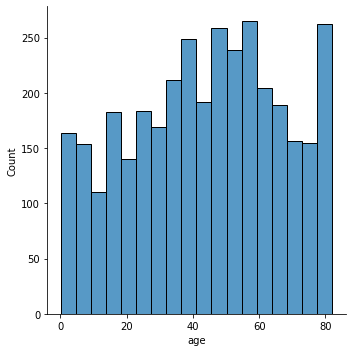

In [187]:
sns.displot(X_train.age)

In [ ]:
#fit_transform
#fit means learn the mean and std
#transform means calculation
X_train = sc.fit_transform(X_train)

#when we only called transform, it will use the mean and std from X_train
X_test  = sc.transform(X_test)

#do you need to standardize y, NO, because y is NOT used in training...

#StandardScaler should be used when your data follows the mean a little bit....
#sometime, your data is VERY noisy, like heart beat, or brain signal or stock price....
#then you don't standardize, because the mean is NOT a good representation....
#in this case, use minmaxscaler
# from sklearn.preprocessing import MinMaxScaler

# 6. Perform machine learning using sklearn.LogisticRegression - 15 mins
- fit
- predict

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#fit....

#predict....

lr.coef_  #but you must standardize first...